## <u> Gaussian Mixture Models Clustering Algorithm Explained </u>

Gaussian mixture models can be used to cluster unlabeled data in much the same way as k-means. There are, however, a couple of advantages to using Gaussian mixture models over k-means.

- k-means does not account for variance(width of the bell shape curve). In two dimensions, variance/ covariance determines the shape of the distribution.

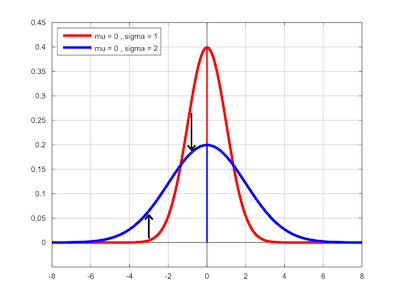

k-means model places a circle (or, in higher dimensions, a hyper-sphere) at the center of each cluster, with a radius defined by the most distant point in the cluster.

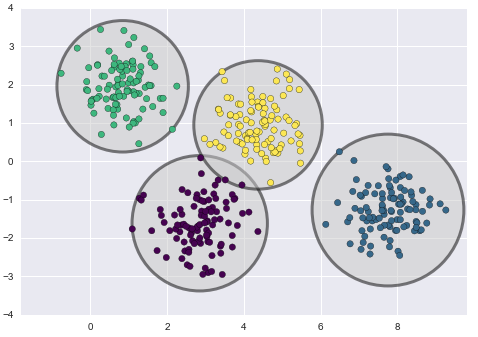

This works fine for when data is circular. However, when data takes on different shape, we end up with something like this.

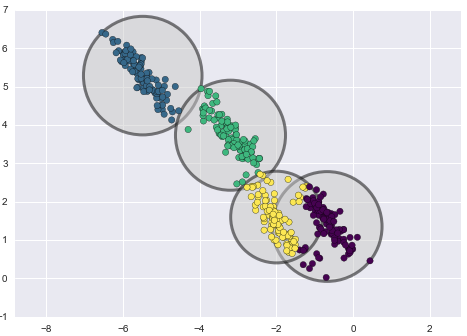

In contrast, Gaussian mixture models can handle even very oblong clusters.

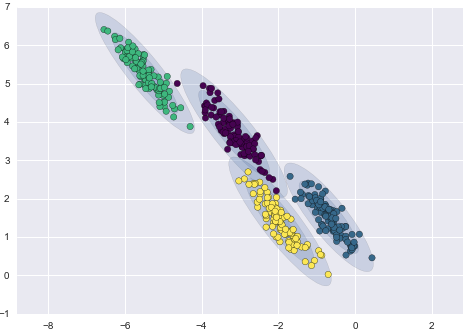

-  K-means performs hard classification whereas GMM performs soft classification, i.e. in k-means, data point is deterministically assigned to one and only one cluster, but in reality there may be overlapping between the cluster  GMM provide us the probabilities of the data point belonging to each of the possible clusters.

In Sklearn, $gmm.predict(X)$ the model assigns every data point to one of the clusters and $gmm.predict\_proba(X)$ function return the probabilities that a data point belongs to each of the K clusters.

Sklearn's GaussianMixture also comes with different options to constrain the covariance of the difference classes estimated: spherical, diagonal, tied or full covariance.

### <u>Gaussian Mixture Models At A Glance</u>

As the name implies, a Gaussian mixture model involves the mixture (i.e. superposition) of multiple Gaussian distributions. Here rather than identifying clusters by “nearest” centroids, we fit a set of k gaussians to the data. And we estimate gaussian distribution parameters such as mean and Variance for each cluster and weight of a cluster. After learning the parameters for each data point we can calculate the probabilities of it belonging to each of the clusters.

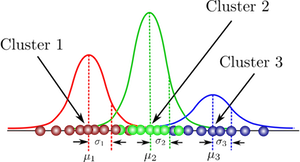

Every distribution is multiplied by a weight $\pi$($\pi_1 + \pi_2 + \pi_3 = 1$) to account for the fact that we do not have an equal number of samples from each category. In other words, we might only have included 1000 people from the red cluster class and 100,000 people from the green cluster class.

### <u>Expectation Maximization</u>

<b><u>Expectation</u></b>

The first step, known as the expectation step or $E$ step, consists of calculating the expectation of the component assignments $C_k$ for each data point $x_i \in X$ given the model parameters $\pi_k$ $\mu_k$ and $\sigma_k$.

<b><u>Maximization</u></b>

The second step is known as the maximization step or $M$ step, which consists of maximizing the expectations calculated in the E step with respect to the model parameters. This step consists of updating the values $\pi_k$, $\mu_k$ and $\sigma_k$.

The entire iterative process repeats until the algorithm converges, giving a maximum likelihood estimate. Intuitively, the algorithm works because knowing the component assignment $C_k$ for each $x_i$ makes solving for $\pi_k$ $\mu_k$ and $\sigma_k$ easy, while knowing $\pi_k$ $\mu_k$  $\sigma_k$ makes inferring $p(C_k|x_i)$ easy. The expectation step corresponds to the latter case while the maximization step corresponds to the former. Thus, by alternating between which values are assumed fixed, or known, maximum likelihood estimates of the non-fixed values can be calculated in an efficient manner.

### <u>Algorithm</u>
- Initialize the mean $\mu_k$, the covariance matrix $\Sigma_k$ and the mixing coefficients $\pi_k$ by some random values(or other values).
- Compute the $C_k$ values for all k.
- Again Estimate all the parameters using the current \C_k values.
- Compute log-likelihood function.
- Put some convergence criterion
- If the log-likelihood value converges to some value (or if all the parameters converge to some values) then stop, else return to Step 2.

This algorithm only guarantee that we land to a local optimal point, but it do not guarantee that this local optima is also the global one. And so, if the algorithm starts from different initialization points, in general it lands into different configurations.


### <u>Example</u>

In [4]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
raw_df = pd.read_csv('./CC GENERAL.csv')
raw_df = raw_df.drop('CUST_ID', axis = 1) 
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [7]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544827


In [8]:
gmm = GaussianMixture(n_components = 3) 
gmm.fit(X_principal)

GaussianMixture(n_components=3)

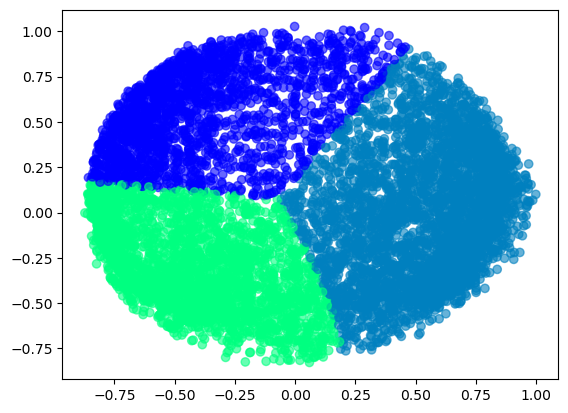

In [9]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = GaussianMixture(n_components = 3).fit_predict(X_principal), cmap =plt.cm.winter, alpha = 0.6) 
plt.show() 

### <u>Number of components(k) selection</u>:

#### <u>Silhouette score</u>

Silhouette score checks how much the clusters are compact and well separated. The more the score is near to one, the better the clustering is. Read more [here](https://www.kaggle.com/vipulgandhi/kmeans-detailed-explanation)

Since we already know that the fitting procedure is not deterministic, we run twenty fits for each number of clusters, then we consider the mean value and the standard deviation of the best five runs.

In [10]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [11]:
n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_principal) 
        labels=gmm.predict(X_principal)
        sil=metrics.silhouette_score(X_principal, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

Text(0, 0.5, 'Score')

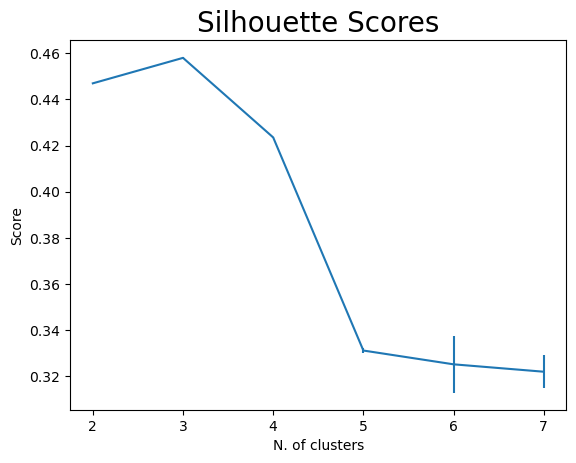

In [12]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")


#### <u>Distance between GMMs</u>

Here we form two datasets, each with an half randomly choose amount of data. We will then check how much the GMMs trained on the two sets are similar, for each configuration.

Since we are talking about distributions, the concept of similarity is embedded in the Jensen-Shannon (JS) metric. The lesser is the JS-distance between the two GMMs, the more the GMMs agree on how to fit the data.

The lower the distance, the better the cluster.

In [13]:
#Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. Here the difference is that we take the squared root, so it's a proper metric

def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

In [14]:
n_clusters=np.arange(2, 8)
iterations=20
results=[]
res_sigs=[]
for n in n_clusters:
    dist=[]
    
    for iteration in range(iterations):
        train, test=train_test_split(X_principal, test_size=0.5)
        
        gmm_train=GaussianMixture(n, n_init=2).fit(train) 
        gmm_test=GaussianMixture(n, n_init=2).fit(test) 
        dist.append(gmm_js(gmm_train, gmm_test))
    selec=SelBest(np.array(dist), int(iterations/5))
    result=np.mean(selec)
    res_sig=np.std(selec)
    results.append(result)
    res_sigs.append(res_sig)

/Users/qjming/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/qjming/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/qjming/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/qjming/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/Users/qjming/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted w

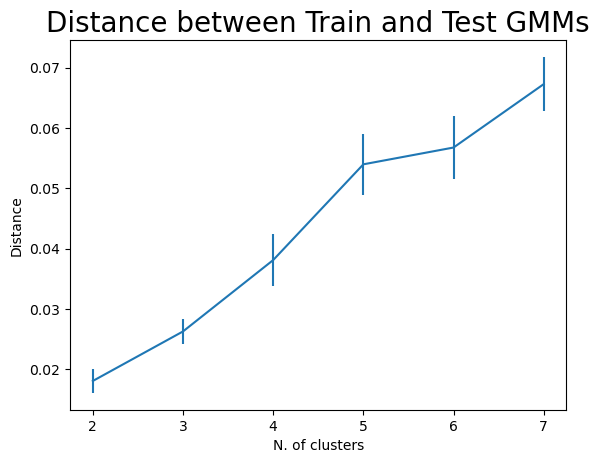

In [15]:
plt.errorbar(n_clusters, results, yerr=res_sigs)
plt.title("Distance between Train and Test GMMs", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()

In [16]:
import numpy as np

# 生成示例数据
np.random.seed(42)
n_samples = 300
data = np.vstack([
    np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], n_samples // 3),
    np.random.multivariate_normal([5, 5], [[1, 0.5], [0.5, 1]], n_samples // 3),
    np.random.multivariate_normal([9, 1], [[1, -0.5], [-0.5, 1]], n_samples // 3)
])

# 初始化参数
n_clusters = 3
n_features = data.shape[1]
weights = np.ones(n_clusters) / n_clusters
means = np.random.rand(n_clusters, n_features) * 10
covariances = np.array([np.eye(n_features) for _ in range(n_clusters)])

# 高斯分布概率密度函数
def gaussian_pdf(x, mean, cov):
    size = len(x)
    det = np.linalg.det(cov)
    norm_const = 1.0 / (np.power((2 * np.pi), size / 2) * np.sqrt(det))
    x_mu = x - mean
    inv = np.linalg.inv(cov)
    result = np.exp(-0.5 * np.dot(np.dot(x_mu.T, inv), x_mu))
    return norm_const * result

# EM算法
max_iter = 100
tol = 1e-6
for iteration in range(max_iter):
    # E步：计算责任度
    responsibilities = np.zeros((data.shape[0], n_clusters))
    for i in range(n_clusters):
        for j in range(data.shape[0]):
            responsibilities[j, i] = weights[i] * gaussian_pdf(data[j], means[i], covariances[i])
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)

    # M步：更新参数
    N_k = responsibilities.sum(axis=0)
    new_weights = N_k / data.shape[0]
    new_means = np.dot(responsibilities.T, data) / N_k[:, None]
    new_covariances = []
    for i in range(n_clusters):
        diff = data - new_means[i]
        cov = np.dot((responsibilities[:, i][:, None] * diff).T, diff) / N_k[i]
        new_covariances.append(cov)
    new_covariances = np.array(new_covariances)

    # 检查收敛
    if np.linalg.norm(new_means - means) < tol:
        break

    weights, means, covariances = new_weights, new_means, new_covariances

# 输出聚类结果
labels = np.argmax(responsibilities, axis=1)
print("聚类完成，最终均值：", means)

聚类完成，最终均值： [[-0.11564239  0.03394768]
 [ 4.88283237  4.90506546]
 [ 8.99231101  0.87146266]]


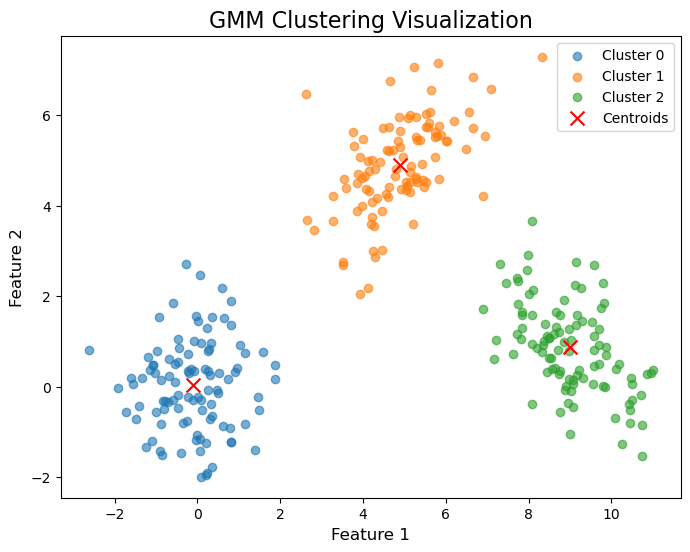

In [17]:
import matplotlib.pyplot as plt

# 绘制聚类结果
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    cluster_data = data[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}', alpha=0.6)

# 绘制簇中心
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=100, label='Centroids')

# 添加标题和图例
plt.title('GMM Clustering Visualization', fontsize=16)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend()
plt.show()

回答课堂问题：1）不同概率密度函数用于生成式模型和判别式模型的区别？

- 生成式模型：生成式模型关注数据的联合概率分布 $ P(X, Y) $，即特征 $ X $ 和标签 $ Y $ 的联合分布。它需要对数据的概率密度函数进行建模，例如高斯分布、指数分布等。通过联合分布可以推导出条件概率 $ P(Y|X) $，从而进行分类或预测。常见的生成式模型包括朴素贝叶斯、隐马尔可夫模型等。  
    
- 判别式模型：判别式模型直接建模条件概率 $ P(Y|X) $ 或决策边界，而不需要建模联合分布 $ P(X, Y) $。它更关注分类边界的优化，通常不需要假设数据的概率密度函数。常见的判别式模型包括逻辑回归、支持向量机（SVM）等。

2）TSVM算法中为什么使用2个样本同时检查？

TSVM（Transductive Support Vector Machine）是一种半监督学习算法，它在有标注数据和无标注数据上同时优化分类边界。TSVM中使用两个样本同时检查的原因是：  

- 优化分类边界：TSVM的目标是找到一个分类超平面，使得有标注样本被正确分类，同时无标注样本尽可能远离分类边界。通过同时检查两个无标注样本，算法可以在不同类别之间调整边界，确保分类器的泛化能力。  

- 平衡类别分布：两个样本分别被分配到不同的类别（正类和负类），这样可以避免类别不平衡问题，确保分类边界的合理性。  

这种方法通过迭代优化，逐步调整分类边界，最终提高分类器的性能。
